# Motifs pipeline

Source: plz refer via link for better instructions https://gitlab.huma-num.fr/adesacy/PyMotifs/-/tree/main?ref_type=heads

This notbooks shows how to use the Motif Pipeline. The Motif pipeline transforms a corpus to motif-based features, or other UDPipe tokens, such as POS, lemma, etc. It consists of 4 steps:
- UDPipe tokenization of the corpus
- tokens preprocessing with n-gram transformation
- n-grams featurization, for example: TFIDF or TF
- visualization, for example: PCA analysis, distributional plots, specificity analysis.

Then, you can return to the texts at different scales :

- Corpus level.
- Document level.
- Motif level.

## Inputs variables

- `corpus_dir`: If you run this notebook for the first time, you need to pass the corpus_dir as parameter in order to annotate the corpus and create the
tokens. The function will automatically create a directory with the annotated corpus.
- Otherwiswe, give the `tokens_dir` (output of the pipeline annotation and transformation into motifs) as argument.
- `token_type`: Define the token type of interest, `AVAILABLE_TOKEN_TYPES = ["text", "lemma", "pos", "motif"]`.
- `feature`: Define the feature on which to perform PCA analysis (see https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System : `bnc`, `nfc`, `atu`, `lpb`).
- `n`: n-gram length of the sequence.

N.B. : by default, the package contains a test corpus available at this path : `PKG_DATA_PATH.joinpath('corpus_test')`. 

## Pip installs

for conda

In [3]:
%pip install coloredlogs

In [1]:
import re

In [6]:
%pip install matplotlib
%pip install seaborn

In [4]:
%pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 3.4 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/24.0 MB 4.2 MB/s eta 0:00:06
   --- ------------------------------------ 2.4/24.0 MB 4.1 MB/s eta 0:00:06
   ----- ---------------------------------- 3.1/24.0 MB 3.9 MB/s eta 0:00:06
   ------ --------------------------------- 3.9/24.0 MB 4.0 MB/s eta 0:00:06
   ------- -------------------------------- 4.7/24.0 MB 4.0 MB/s eta 0:00:05
   --------- ------------------------------ 5.8/24.0 MB 3.9 MB/s eta 0:00:05
   ---------- ----------------------------- 6.6/24.0 MB 4.0 MB/s eta 0:00:05
   ------------ --------------------------- 7.3/24.0 MB 3.9 MB/s eta 0:00:05
   ------------- -------------------------- 8.4/24.0 MB 4.0 MB/s eta 0:00:04
   --------------- ------------------------ 9.4/24.0 MB 4.1 MB/s eta 0:00:04
   ----------------- ---------------------- 10.5/24.0 MB 4.1 MB/s eta 0:00:04
   --

  You can safely remove it manually.
  You can safely remove it manually.


In [6]:
%pip install numpy==1.24.4


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 799.2 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/14.8 MB 860.9 kB/s eta 0:00:17
   -- ------------------------------------- 1.0/14.8 MB 898.8 kB/s eta 0:00:16
   -- ------------------------------------- 1.0/14.8 MB 898.8 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/14.8 MB 932.1 kB/s eta 0:00:15
   ---- ----------------------------------- 1.6/14.8 MB 976.0 kB/s eta 0:00:14
   ---- ----------------------------------- 1.8/14.8 MB 1.0 MB/s eta 0:00:13
   ----- ---------------------------------- 2.1/14.8 MB 1.0 MB/s eta 0:00:13
   ------- -------------------------------- 2.6/14.8 MB 1.1 MB/s eta 0:00:12
   ------- ----

In [8]:
%pip install numpy==1.18.1

In [9]:
%pip install scipy==1.4.1 
%pip install pandas==0.23.4

     ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
     ---------------------------------------- 0.3/24.6 MB ? eta -:--:--
     ---------------------------------------- 0.3/24.6 MB ? eta -:--:--
      -------------------------------------- 0.5/24.6 MB 799.2 kB/s eta 0:00:31
     - ------------------------------------- 0.8/24.6 MB 838.9 kB/s eta 0:00:29
     - ------------------------------------- 1.0/24.6 MB 898.8 kB/s eta 0:00:27
     -- ------------------------------------ 1.3/24.6 MB 932.1 kB/s eta 0:00:25
     -- ------------------------------------ 1.3/24.6 MB 932.1 kB/s eta 0:00:25
     -- ------------------------------------ 1.6/24.6 MB 932.2 kB/s eta 0:00:25
     -- ------------------------------------ 1.8/24.6 MB 958.5 kB/s eta 0:00:24
     --- ------------------------------------ 2.1/24.6 MB 1.0 MB/s eta 0:00:23
     --- ------------------------------------ 2.4/24.6 MB 1.0 MB/s eta 0:

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [84 lines of output]
      Ignoring numpy: markers 'python_version == "3.5" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.5" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
        Using cached wheel-0.45.1-py3-none

     ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
      --------------------------------------- 0.3/10.5 MB ? eta -:--:--
     -- ------------------------------------- 0.8/10.5 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/10.5 MB 2.8 MB/s eta 0:00:04
     ------- -------------------------------- 2.1/10.5 MB 2.7 MB/s eta 0:00:04
     --------- ------------------------------ 2.6/10.5 MB 2.8 MB/s eta 0:00:03
     ------------ --------------------------- 3.4/10.5 MB 3.0 MB/s eta 0:00:03
     --------------- ------------------------ 4.2/10.5 MB 3.0 MB/s eta 0:00:03
     ------------------ --------------------- 5.0/10.5 MB 3.1 MB/s eta 0:00:02
     -------------------- ------------------- 5.5/10.5 MB 3.1 MB/s eta 0:00:02
     ----------------------- ---------------- 6.3/10.5 MB 3.2 MB/s eta 0:00:02
     -------------------------- ------------- 7.1/10.5 MB 3.2 MB/s eta 0:00:02
     ----------------------------- ---------- 7.9/10.5 MB 3.2 MB/s

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      C:\Users\Thinkpad\AppData\Local\Temp\pip-install-aottmr28\pandas_8317f0f112c14a81963dbe989d13920a\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      c:\Users\Thinkpad\anaconda3\envs\pymotifs\Lib\site-packages\setuptools\__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
  

In [3]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 4.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 3.8 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.7 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.5 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 3.5 MB/s eta 0:00:01
   ----------

In [7]:
%pip install spacy-udpipe

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 2.8 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/12.2 MB 3.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/12.2 MB 3.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.2 MB 3.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/12.2 MB 3.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.7/12.2 MB 3.9 MB/s eta 0:00

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [9]:
%pip install blis

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.2 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd

In [3]:
%pip show numpy

Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRI

In [4]:
%pip show gensim

Name: gensim
Version: 4.3.3
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: c:\Users\Thinkpad\anaconda3\envs\pymotifs\Lib\site-packages
Requires: numpy, scipy, smart-open
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### code start

In [2]:
from motifs.config import PKG_DATA_PATH

# Define the path of the corpus
corpus_dir = PKG_DATA_PATH.joinpath("hugo_vs_neu")
# corpus_dir = our_path
tokens_dir = None
# Ex : tokens_dir = "../data/canon/tokens_canon"
# Ex : corpus_dir = None

# Define the token type: AVAILABLE_TOKEN_TYPES = ["text", "lemma", "pos", "motif"]
token_type = "motif"

# Define the feature on which to perform PCA analysis
feature = {"name": "tfidf", "params": {"normalize": True, "smartirs": "nfc"}}
# Please check gensim doc for the parameters definition. SMARTIRS
# corresponds to the standard notation available at https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System

# n-gram length
n = 5

In [1]:
from motifs.config import PKG_DATA_PATH

# Define the path of the corpus
corpus_dir = PKG_DATA_PATH.joinpath("hugo_vs_neu")
# corpus_dir = our_path
tokens_dir = "PKG_DATA_PATH.joinpath()"
# Ex : tokens_dir = "../data/canon/tokens_canon"
# Ex : corpus_dir = None

# Define the token type: AVAILABLE_TOKEN_TYPES = ["text", "lemma", "pos", "motif"]
token_type = "motif"

# Define the feature on which to perform PCA analysis
feature = {"name": "tfidf", "params": {"normalize": True, "smartirs": "nfc"}}
# Please check gensim doc for the parameters definition. SMARTIRS
# corresponds to the standard notation available at https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System

# n-gram length
n = 5

In [2]:
corpus_dir

WindowsPath('c:/Users/Thinkpad/Documents/GitHub/VictorIA-Hugo/src/motifs_space/motifs/data/hugo_vs_neu')

## Import librairies

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from motifs.pipeline import Pipeline
from motifs.plots import plot_motif_histogram, plot_tf_idf
from motifs.pca import pca_transform
import time

## Create pipeline object and perform annotation

The `Pipeline` class performs the annotation based on raw files (.txt) of the corpus directory and transform the corpus into the choosen `token_type`. The help() function gives documentation of the function and its parameters.

In [3]:
help(Pipeline)

Help on class Pipeline in module motifs.pipeline:

class Pipeline(builtins.object)
 |  Pipeline(token_type: str, tokens_dir: Optional[str] = None, corpus_dir: Optional[str] = None, docs: Optional[List] = None, save: bool = True, output_dir: Optional[str] = None, **kwargs)
 |  
 |  The Motif pipeline transforms a corpus to motif-based features, or other
 |  UDPipe tokens, such as POS, lemma, etc. It consists of 4 steps:
 |  - UDPipe tokenization of the corpus
 |  - tokens preprocessing with n-gram transformation
 |  - n-grams featurization, for example: TFIDF or TF
 |  - visualization, for example: PCA analysis, distributional plots,
 |  specificity analysis.
 |  
 |  :param token_type: type of the token to use for the analysis. Should be
 |  one of ["text", "lemma", "pos", "motif"]
 |  :param feature: Feature's configuration.
 |  :param tokens_dir: The folder where the tokens for each text is located.
 |  The tokens should be stored in a csv file obtained from `transform_corpus`
 |  of

In [4]:
pipeline = Pipeline(token_type, corpus_dir=corpus_dir, tokens_dir=tokens_dir, save=True)

[PyMotifs-Logger:pipeline.py:79] - [47480] - 2024-12-27 03:57:28 - DEBUG - Creating output destination at c:\Users\Thinkpad\Documents\VictorIA\PyMotifs\src/20241227_035728_pipeline
[PyMotifs-Logger:tokenizer.py:128] - [47480] - 2024-12-27 03:57:28 - DEBUG - Creating output destination at c:\Users\Thinkpad\Documents\VictorIA\PyMotifs\src/20241227_035728_pipeline\tokens
[PyMotifs-Logger:tokenizer.py:299] - [47480] - 2024-12-27 03:57:34 - DEBUG - Steps to go 3: tokenizing hugo2neutral_para__merged.txt...
[PyMotifs-Logger:tokenizer.py:317] - [47480] - 2024-12-27 03:57:48 - DEBUG - Done with hugo2neutral_para__merged.txt in 13.97 seconds.
[PyMotifs-Logger:tokenizer.py:299] - [47480] - 2024-12-27 03:57:48 - DEBUG - Steps to go 2: tokenizing hugo_para__merged.txt...
[PyMotifs-Logger:tokenizer.py:317] - [47480] - 2024-12-27 03:58:08 - DEBUG - Done with hugo_para__merged.txt in 19.5 seconds.
[PyMotifs-Logger:tokenizer.py:299] - [47480] - 2024-12-27 03:58:08 - DEBUG - Steps to go 1: tokenizing n

## Transform tokens to n-grams

The `transform_to_ngrams` function transforms the annotated corpus into motifs of n-grams length. The parameter is the length of the sequence you want (ngrams).

In [5]:
t1 = time.time()
# Transform to n_grams
pipeline.transform_to_ngrams(n)
t2 = time.time()
print(f"Execution time: {t2 - t1:.4f} secs")

Execution time: 6.8345 secs


## Simple statistics

### Number of tokens per document

Text(0.5, 1.0, 'Number of tokens per document')

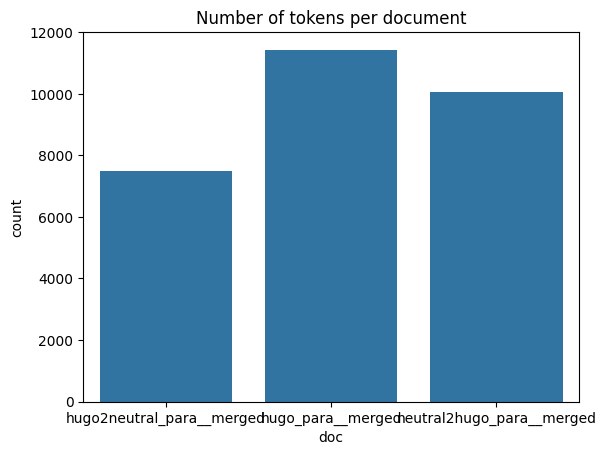

In [6]:
## Number of tokens per document
sns.countplot(pipeline.ngrams, x="doc")
plt.title("Number of tokens per document")

In [7]:
help(plot_motif_histogram)

Help on function plot_motif_histogram in module motifs.plots:

plot_motif_histogram(ngrams: pandas.core.frame.DataFrame, stat: str = 'count', n_tokens: int = 15, plot_type: str = 'group')
    Create a histogram plot of the n-grams based on different statistics such
    as "count" (default), "proportion", or "percent". The n_tokens
    corresponds to the maximum number of tokens to represent on
    the graph.
    
    :param ngrams: DataFrame of ngrams tokens with columns: ["token", "doc"]
    :param stat: One of ["count", "proportion", "percent"]
    :param n_tokens: Max number of tokens to plot
    :param plot_type: "group" or "sep"
    :return:



c:\Users\Thinkpad\anaconda3\envs\pymotifs\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


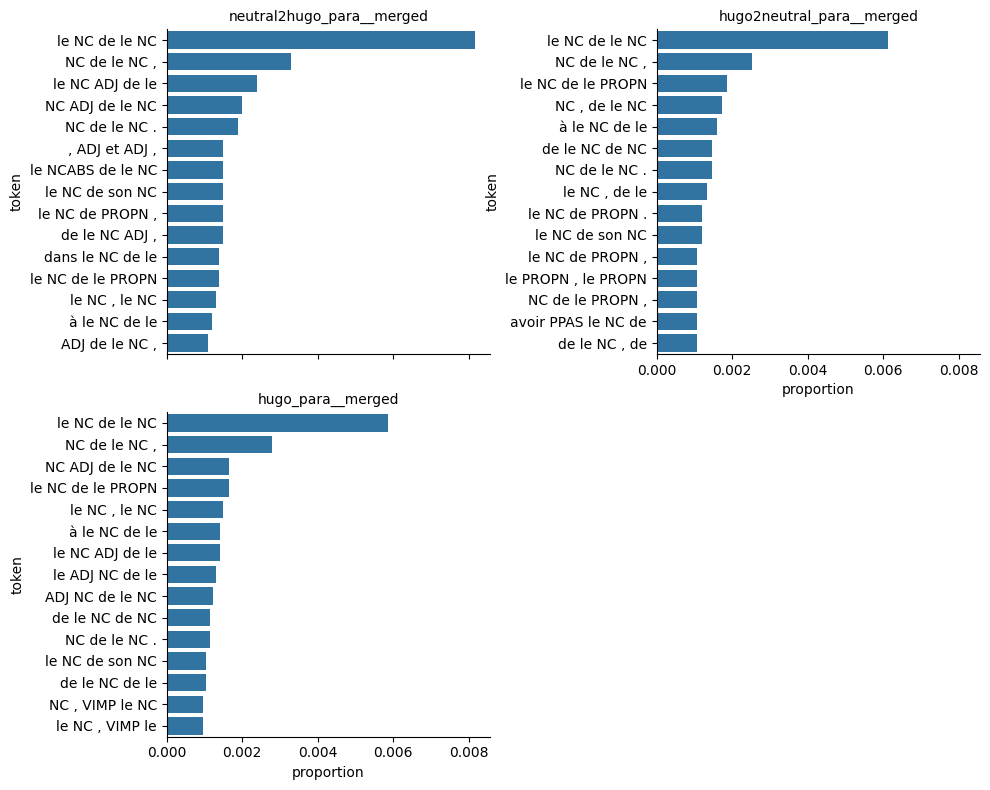

In [19]:
# Plot distribution of tokens separatly
plot_motif_histogram(pipeline.ngrams, stat="proportion", n_tokens=15, plot_type="sep")

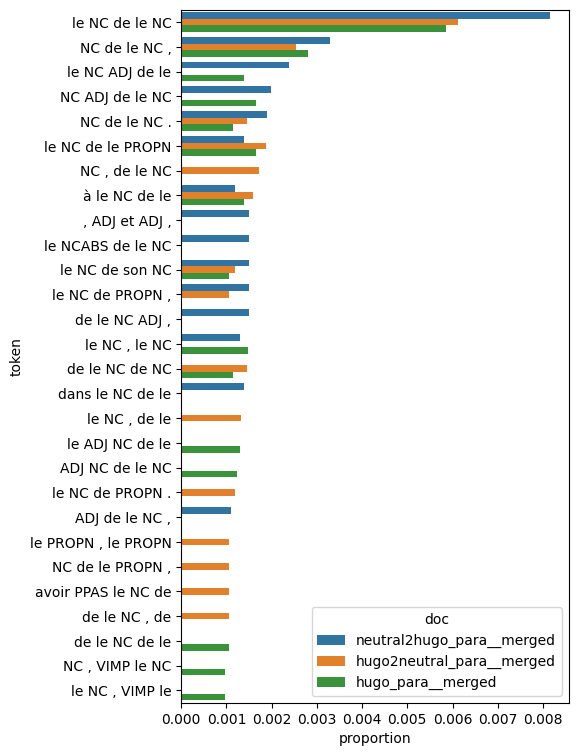

In [20]:
# Plot distribution of tokens grouped
plot_motif_histogram(pipeline.ngrams, stat="proportion", n_tokens=15, plot_type="group")

## Compute features (Tf-idf)

In this example, we use tf-idf features and we plot the most frequent ones. The idea here is to distinguish texts of a corpus from one another. The larger the tf-idf score is, the most specific of a text it is within the corpus.

c:\Users\Thinkpad\anaconda3\envs\pymotifs\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


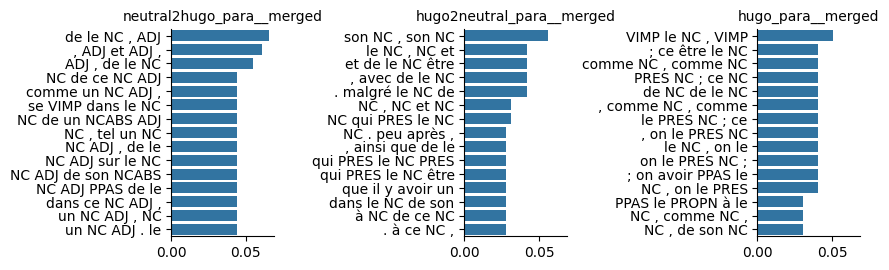

In [21]:
tfidf = pipeline.get_features(feature)
plot_tf_idf(tfidf, n_tokens=15, plot_type="sep")

Presenting the TF-IDF bar plot within one chart shows whether one document has more specific motifs than the other documents within a corpus.

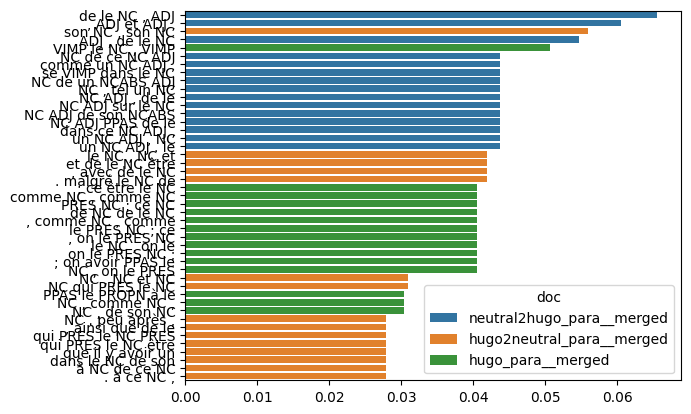

In [10]:
tfidf = pipeline.get_features(feature)
plot_tf_idf(tfidf, n_tokens=15, plot_type="group")

## Principal Component Analysis


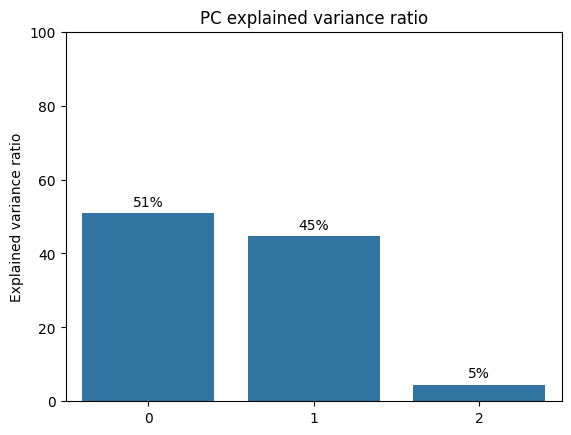

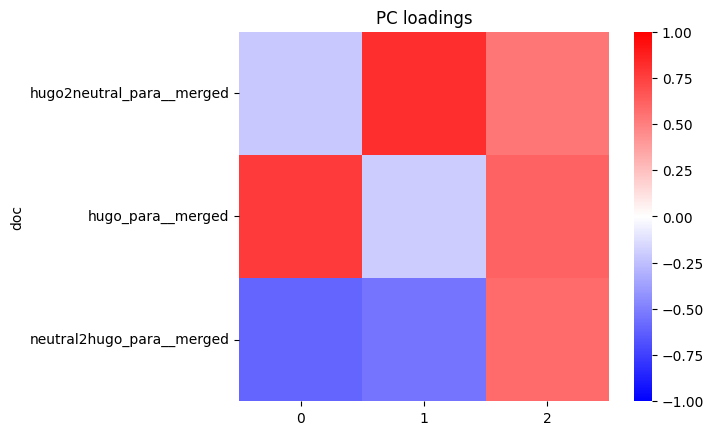

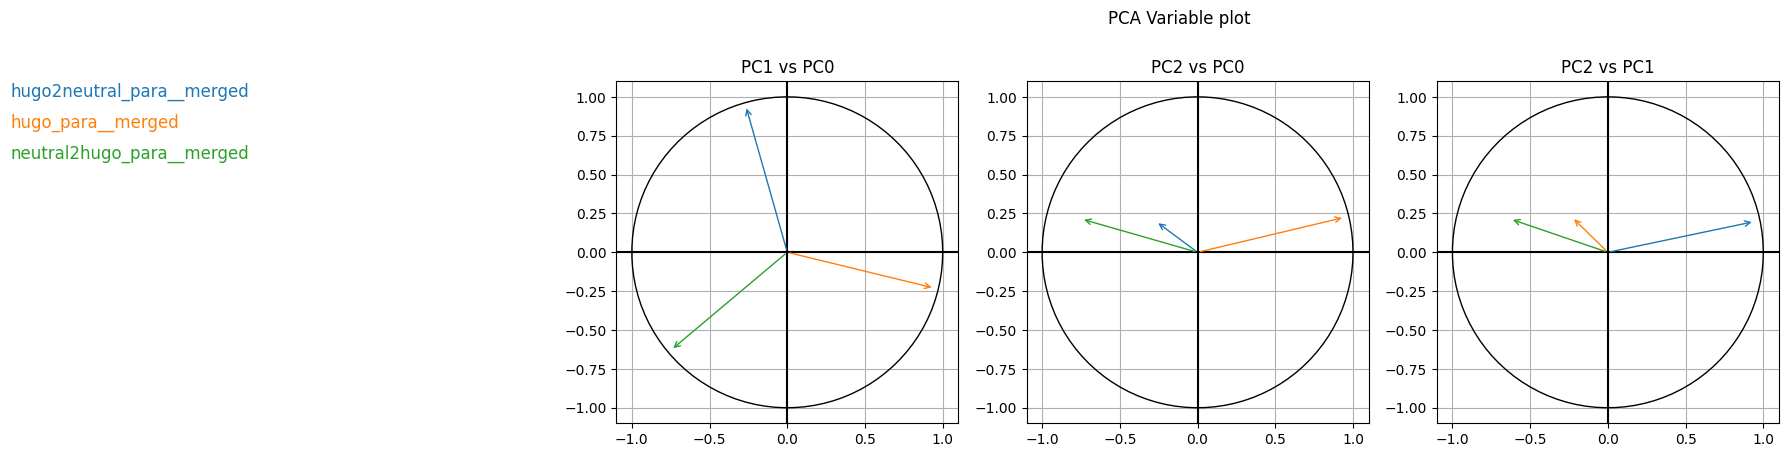

In [22]:
pca = pca_transform(
    tfidf.pivot_table(
        index="token", columns=["doc"], values=feature["name"]
    ), 
    plot=True
)

Interpretation -- ?

## Specificity calculation

- Based on Pierre Lafon's work
- It tests the hypothesis of random distribution of tokens between segments in a corpus.
- It distinguished between tokens being overused and underused.
- Implemented by function `build_specificity`

To develop, the specificity calculation is based on the work of Pierre Lafon ; it aims to "measures the expected or exceptional frequency of a word (or complex pattern, linguistic feature, etc.) in a part of the corpus, in relation to its frequency in the corpus as a whole and the size of the part. [...] The calculation is equivalent to listing all possible combinations of words in the different parts of the corpus, and evaluating the probability of each frequency according to the proportion of times it could theoretically be encountered if all combinations were equally possible. The test is therefore exact in that it directly and completely models the hypothesis of random distribution of words between parts." (see : https://shs.hal.science/halshs-03763801/file/pincemin_semantique-pur22_181127.pdf ; Lafon, Pierre, 1980, « Sur la variabilité de la fréquence des formes dans un corpus », _MOTS_, n°1, p. 127-165). The function `build_specificity` implement and do this specificity calculation.

In [23]:
from motifs.features import build_specificity
spec = build_specificity(pipeline.ngrams)

You can now navigate into the results of the calculation and perform different analysis :

- By selecting one document and select the n most frequent specificities of the document (document level).
- By selecting the highest specificities within the corpus (bottom-up analysis).
- By selecting one token (motif, pos, lemma or word) and see all its appearances in the corpus (top-down analysis).

The idea here is to facilitate and permit interpretation of the results at every level (no black box phenomenon) by returning to texts.

## Return to texts

### At the document level

In [25]:

# Show the 10 most specific tokens for Balzac-Goriot:
doc = "hugo_para__merged"
spec.sort_values(by=[doc, "spec"], ascending=False).head(10)

,hugo2neutral_para__merged,hugo_para__merged,neutral2hugo_para__merged,doc,f,t,spec,rel_f
token,,,,,,,,
"le NC , VIMP le",-1.691934,2.941528,-2.403597,hugo_para__merged,11,11437,2.941528,0.000962
"le NC , VIMP le",-1.691934,2.941528,-2.403597,hugo2neutral_para__merged,1,7506,-1.691934,0.000133
"le NC , VIMP le",-1.691934,2.941528,-2.403597,neutral2hugo_para__merged,1,10050,-2.403597,0.000100
"NC , VIMP le NC",-1.051743,2.465293,-2.588545,hugo_para__merged,11,11437,2.465293,0.000962
"NC , VIMP le NC",-1.051743,2.465293,-2.588545,hugo2neutral_para__merged,2,7506,-1.051743,0.000266
"NC , VIMP le NC",-1.051743,2.465293,-2.588545,neutral2hugo_para__merged,1,10050,-2.588545,0.000100
"VIMP le NC , VIMP",0.000000,2.020135,0.000000,hugo_para__merged,5,11437,2.020135,0.000437
", NC , NC ,",0.000000,1.758284,-1.294078,hugo_para__merged,6,11437,1.758284,0.000525
", NC , NC ,",0.000000,1.758284,-1.294078,neutral2hugo_para__merged,1,10050,-1.294078,0.000100


### At the corpus level (bottom-up analysis)

The function `return_to_text_from_spec` enables to select the highest specificities within the corpus and give context and statistics based on the analysed tokens.

__N.B. : the parameters `min_spec` and `min_freq` are very important and should be used to minimize the number of results and the calculation time if you work with an important number of texts. If you need more information, see `help(return_to_text_from_spec`)__

In [26]:
from motifs.utils import return_to_text_from_spec
import time
t1 = time.time()
context = return_to_text_from_spec(pipeline.ngrams, spec, n, context_len=10, min_spec=1, min_freq=2)
t2 = time.time()
print(t2-t1)
context

2.355638027191162


,left_context,text,right_context,doc,spec,f,t
token,,,,,,,
", ADJ et ADJ ,","lui , possédait une beauté qui n' était point ...",", insipide et fade ,","de certains courtisans ; non , il se distingua...",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,","la voie à la guerre , la pensée de Combeferre",", douce et lumineuse ,","ne cherchait que la paix . Ils se complétaient ,",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",", tels deux pôles d' une même force : Enjolras",", austère et intransigeant ,","portait la flamme de le droit divin , tandis que",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",est splendeur . Les falaises sombres de les de...,", majestueuses et silencieuses ,",plongent leurs reflets dans les eaux immobiles...,neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",". Vers le milieu de la nuit , une mélodie",", douce et dangereuse ,","émanant d' une guitare , troubla le calme , ve...",neutral2hugo_para__merged,5.111894,15,10050
...,...,...,...,...,...,...,...
le NC ADJ de le,se dressa l' insondable abîme de la douleur . ...,la cour austère de la,"vieille prison , les gardiens s' affairaient ,...",neutral2hugo_para__merged,-2.885053,4,7506
le NC ADJ de le,"s' affairaient , silhouettes sombres et sévère...",les ombres besogneuses de la,"nuit . Parmi eux , quelques Parisiens , curieu...",neutral2hugo_para__merged,-2.885053,4,7506
le NC ADJ de le,"en un sinistre chœur métallique . Et là-haut , à",les fenêtres crasseuses de la,"prison , les forçats , séparés de leurs geôles d'",neutral2hugo_para__merged,-2.885053,4,7506


In [27]:
from motifs.utils import return_to_text_from_spec
import time
t1 = time.time()
context = return_to_text_from_spec(pipeline.ngrams, spec, n, context_len=10, min_spec=1, min_freq=2)
t2 = time.time()
print(t2-t1)
context

2.019705057144165


,left_context,text,right_context,doc,spec,f,t
token,,,,,,,
", ADJ et ADJ ,","lui , possédait une beauté qui n' était point ...",", insipide et fade ,","de certains courtisans ; non , il se distingua...",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,","la voie à la guerre , la pensée de Combeferre",", douce et lumineuse ,","ne cherchait que la paix . Ils se complétaient ,",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",", tels deux pôles d' une même force : Enjolras",", austère et intransigeant ,","portait la flamme de le droit divin , tandis que",neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",est splendeur . Les falaises sombres de les de...,", majestueuses et silencieuses ,",plongent leurs reflets dans les eaux immobiles...,neutral2hugo_para__merged,5.111894,15,10050
", ADJ et ADJ ,",". Vers le milieu de la nuit , une mélodie",", douce et dangereuse ,","émanant d' une guitare , troubla le calme , ve...",neutral2hugo_para__merged,5.111894,15,10050
...,...,...,...,...,...,...,...
le NC ADJ de le,se dressa l' insondable abîme de la douleur . ...,la cour austère de la,"vieille prison , les gardiens s' affairaient ,...",neutral2hugo_para__merged,-2.885053,4,7506
le NC ADJ de le,"s' affairaient , silhouettes sombres et sévère...",les ombres besogneuses de la,"nuit . Parmi eux , quelques Parisiens , curieu...",neutral2hugo_para__merged,-2.885053,4,7506
le NC ADJ de le,"en un sinistre chœur métallique . Et là-haut , à",les fenêtres crasseuses de la,"prison , les forçats , séparés de leurs geôles d'",neutral2hugo_para__merged,-2.885053,4,7506
